<a href="https://colab.research.google.com/github/capnmav77/CIE_ml/blob/main/basixipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine learning, 

In [6]:
import pandas as pd 
a=10
b=20
print(a+b)


30


pandas is used to organise the data efficiently 

In [7]:
import pandas as pd
step_data = [3620,7891,9761,
             3907,4338,5373]
step_counts = pd.Series(step_data,name='steps')
print(step_counts)

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


we map the index of the date to the step count and increment the days upto 6 days

In [8]:
step_counts.index = pd.date_range('20210223',periods = 6)
print(step_counts)

2021-02-23    3620
2021-02-24    7891
2021-02-25    9761
2021-02-26    3907
2021-02-27    4338
2021-02-28    5373
Freq: D, Name: steps, dtype: int64


in case we need a key value pair , we use it like a dictonary and to get the type of data we are using we use the below code.

In [9]:
print(step_counts['2021-02-24'])
print(step_counts.dtypes)

7891
int64


In [10]:
#creating invalid data
import numpy as np
step_counts[1:3] = np.NaN

#filling it with zeros
step_counts =step_counts.fillna(0.)
#equivalently 
#step_counts.fillna(0.,inplace =True)

print(step_counts[1:3])

2021-02-24    0.0
2021-02-25    0.0
Freq: D, Name: steps, dtype: float64


creating a 2d array of multiple data we use zip and converting to 2d array we use dataframe

In [11]:
cycling_data = [10.7,0,None,2.4,15.3,10.9,0,None]
joined_data = list(zip(step_data,cycling_data))#using to zip both step and cycling data
activity_df = pd.DataFrame(joined_data)#combining both data into a 2d frame 
print(activity_df)

      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


In [12]:
print(activity_df.loc[3])

0    3907.0
1       2.4
Name: 3, dtype: float64


we need to alter the cols and rows 

In [13]:
activity_df = pd.DataFrame(joined_data,index = pd.date_range('20210223',periods = 6),columns=['walking','cycling'])
print(activity_df)

            walking  cycling
2021-02-23     3620     10.7
2021-02-24     7891      0.0
2021-02-25     9761      NaN
2021-02-26     3907      2.4
2021-02-27     4338     15.3
2021-02-28     5373     10.9


In [14]:
print(activity_df.walking)#since python is a oop we can use this 

2021-02-23    3620
2021-02-24    7891
2021-02-25    9761
2021-02-26    3907
2021-02-27    4338
2021-02-28    5373
Freq: D, Name: walking, dtype: int64


loading data:

In [15]:
data = pd.read_csv('/content/iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [18]:
import pandas as pd
data['abbrev'] = (data.variety.apply(lambda x:x.replace('Iris-','')))#apply is a function of pandas 
# lambda is a function in a code that is used to apply lambda(x:2 if (2>3):3)
small_data = pd.concat([data.iloc[:2],data.iloc[:-2]])# to concat 2 datasets 
print(small_data)

     sepal.length  sepal.width  petal.length  petal.width    variety  \
0             5.1          3.5           1.4          0.2     Setosa   
1             4.9          3.0           1.4          0.2     Setosa   
0             5.1          3.5           1.4          0.2     Setosa   
1             4.9          3.0           1.4          0.2     Setosa   
2             4.7          3.2           1.3          0.2     Setosa   
..            ...          ...           ...          ...        ...   
143           6.8          3.2           5.9          2.3  Virginica   
144           6.7          3.3           5.7          2.5  Virginica   
145           6.7          3.0           5.2          2.3  Virginica   
146           6.3          2.5           5.0          1.9  Virginica   
147           6.5          3.0           5.2          2.0  Virginica   

        abbrev  
0       Setosa  
1       Setosa  
0       Setosa  
1       Setosa  
2       Setosa  
..         ...  
143  Virginica  

group by species 

In [31]:
group_sizes  = (data.groupby('variety').size())# keyword to count, is .size and 
print(data.mean())#calculates the mean of of all the colums similarly median and mode can be calculated
print(data.mode())


# all the above can be done by 
print(data.describe())
data.columns = ["","sepal_length",'sepal_width',"petal_length","petal_width","variety"]
data

                5.843333
sepal_length    3.057333
sepal_width     3.758000
petal_length    1.199333
dtype: float64
        sepal_length  sepal_width  petal_length petal_width     variety
0  5.0           3.0          1.4           0.2      Setosa      Setosa
1  NaN           NaN          1.5           NaN  Versicolor  Versicolor
2  NaN           NaN          NaN           NaN   Virginica   Virginica
                   sepal_length  sepal_width  petal_length
count  150.000000    150.000000   150.000000    150.000000
mean     5.843333      3.057333     3.758000      1.199333
std      0.828066      0.435866     1.765298      0.762238
min      4.300000      2.000000     1.000000      0.100000
25%      5.100000      2.800000     1.600000      0.300000
50%      5.800000      3.000000     4.350000      1.300000
75%      6.400000      3.300000     5.100000      1.800000
max      7.900000      4.400000     6.900000      2.500000


<ipython-input-31-c67204c35094>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.mean())#calculates the mean of of all the colums similarly median and mode can be calculated


,,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa,Setosa
1,4.9,3.0,1.4,0.2,Setosa,Setosa
2,4.7,3.2,1.3,0.2,Setosa,Setosa
3,4.6,3.1,1.5,0.2,Setosa,Setosa
4,5.0,3.6,1.4,0.2,Setosa,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,Virginica
146,6.3,2.5,5.0,1.9,Virginica,Virginica
147,6.5,3.0,5.2,2.0,Virginica,Virginica
148,6.2,3.4,5.4,2.3,Virginica,Virginica


In [32]:
#sampling data

sample = (data.sample(n=5,replace=False,random_state=42))# replacement is false i.e not getting it back 
print(sample)

          sepal_length  sepal_width  petal_length petal_width     variety
73   6.1           2.8          4.7           1.2  Versicolor  Versicolor
18   5.7           3.8          1.7           0.3      Setosa      Setosa
118  7.7           2.6          6.9           2.3   Virginica   Virginica
78   6.0           2.9          4.5           1.5  Versicolor  Versicolor
76   6.8           2.8          4.8           1.4  Versicolor  Versicolor


(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <BarContainer object of 25 artists>)

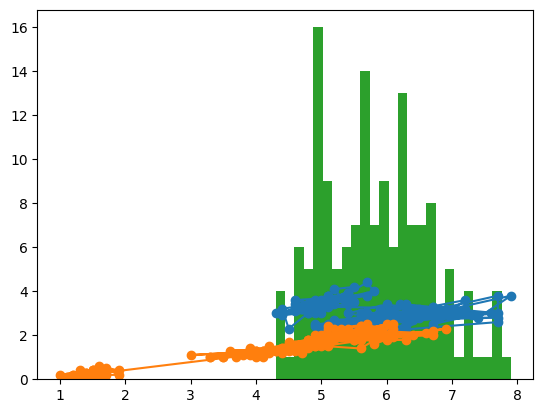

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('/content/iris.csv')
plt.plot(data['sepal.length'],data['sepal.width'],marker='o',label='sapel')
plt.plot(data['petal.length'],data['petal.width'],marker='o',label='petal')

plt.hist(data['sepal.length'],bins=25)#width if the bar of the histogram , 25 units 
